## load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
df = pd.read_csv("./data/crawled/trump.tsv", quoting=3, sep="\t")

In [4]:
df = df.drop_duplicates(subset="text")

In [5]:
df = df[df["text"].str.len() > 20]

In [6]:
df.describe(include="all")

,tweet_id,user_id,publish_date,text,user_gender,location
count,9.471350e+05,9.471350e+05,947135,947135,947135,947135
unique,NaN,NaN,893947,947135,3,52
top,NaN,NaN,2017-05-05 20:05:06,@realDonaldTrump so much winning #Trump we can...,UNKNOWN,None
freq,NaN,NaN,7,1,502225,295002
mean,8.456891e+17,1.005903e+17,NaN,NaN,NaN,NaN
std,2.124276e+16,2.565103e+17,NaN,NaN,NaN,NaN
min,1.008187e+10,1.800000e+01,NaN,NaN,NaN,NaN
25%,8.270351e+17,4.903502e+07,NaN,NaN,NaN,NaN
50%,8.418161e+17,3.421480e+08,NaN,NaN,NaN,NaN
75%,8.643098e+17,2.492043e+09,NaN,NaN,NaN,NaN


In [7]:
df["publish_date"] = pd.to_datetime(df['publish_date'].astype(str), format='%Y-%m-%d')

In [8]:
df.index = df["publish_date"]
df.resample("W").count()

,tweet_id,user_id,publish_date,text,user_gender,location
publish_date,,,,,,
2016-10-09,2,2,2,2,2,2
2016-10-16,5,5,5,5,5,5
2016-10-23,6,6,6,6,6,6
2016-10-30,12,12,12,12,12,12
2016-11-06,43,43,43,43,43,43
2016-11-13,214,214,214,214,214,214
2016-11-20,49,49,49,49,49,49
2016-11-27,1582,1582,1582,1582,1582,1582
2016-12-04,2750,2750,2750,2750,2750,2750


## load model

In [9]:
import numpy as np
import pickle

In [10]:
%ls ../*.txt

../glove.twitter.27B.100d.txt  ../glove.twitter.27B.25d.txt
../glove.twitter.27B.200d.txt  ../glove.twitter.27B.50d.txt


In [11]:
loadGlove = False
if loadGlove:
    glove = {}
    f = open("../glove.twitter.27B.200d.txt")
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove[word] = coefs
    f.close()
    with open("./data/glove.pkl", "wb") as f2:
        pickle.dump(glove, f2)
else:
    with open("./data/glove.pkl", "rb") as f:
        glove = pickle.load(f)
print('Found %s word vectors.' % len(glove))

Found 1193514 word vectors.


In [12]:
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [13]:
K.clear_session()
hybrid_model = load_model("./logs/pretrain_2/hybrid/weights.12.hdf5")
word_model = load_model("./logs/pretrain_2/word/weights.10.hdf5")

## preprocess

In [14]:
import data.preprocess as p
from tqdm import tqdm_notebook as tqdm
import pickle
import numpy as np
from data.char import text_to_1hot_matrix
import random
import datetime

In [15]:
embedding_matrix = np.load("./data/word_outputs/glove_embedding.npy")

In [16]:
with open("./data/word_outputs/vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [17]:
max_len = 40
count = 0
def tokens2vectors(tokens):
    m = np.zeros((max_len, 200))
    for i, t in enumerate(tokens[:max_len]):
        if t not in vocab["word2id"].keys():
            if t in glove:
                m[i] = glove[t]
        else:
            m[i] = embedding_matrix[vocab["word2id"][t]]
    return m


In [18]:
def get_predictions(_df):
    tweets = _df.text.tolist()
    _tweets = [p.preprocess_tweet(t) for t in tweets]
    print("preprocessed tweets")
    _tweets = [t.split("\t") for t in _tweets]
    tweets_word = np.array(list(map(tokens2vectors, _tweets)))
    print(tweets_word.shape)
    tweets_char = np.array([text_to_1hot_matrix(row) for row in tweets])
    
    hybrid_preds = np.argmax(hybrid_model.predict([tweets_char, tweets_word], batch_size=128, verbose=1), axis=1)
    word_preds = np.argmax(word_model.predict(tweets_word, batch_size=128, verbose=1), axis=1)
    return hybrid_preds, word_preds

In [19]:
def draw_graph(_df, splitted=True):
    date = []
    hybrid = []
    word = []
    agree = []
    if not splitted:
        splitted_df = []
        for group_name, df_group in _df.groupby(pd.TimeGrouper("W")):
            if group_name.year == 2017 and group_name.month >= 1:
                hybrid_preds, word_preds = get_predictions(df_group)
                splitted_df.append({"date": group_name, 
                                           "hybrid_preds": hybrid_preds,
                                           "word_preds": word_preds,
                                            "df": df_group})
    else:
        splitted_df = _df
        
    
    for timeframe in splitted_df:
        date.append(timeframe["date"])

        total = len(timeframe["hybrid_preds"])

        hybrid.append(np.count_nonzero(timeframe["hybrid_preds"])/total)
        word.append(np.count_nonzero(timeframe["word_preds"])/total)
        
        agree_count = 0
        for i in range(len(timeframe["hybrid_preds"])):
            if (timeframe["hybrid_preds"][i] == timeframe["word_preds"][i] 
                and timeframe["hybrid_preds"][i] == 1):
                agree_count += 1
        agree.append(agree_count/total)
        timeframe["agree_count"] = agree_count
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.plot(date, hybrid)
    plt.gcf().autofmt_xdate()
    
    #plt.title('among 295,000 tweets from United Kingdom randomly sampled', 
    #           fontsize=12)
    #plt.suptitle('Tweets classified as Abusive Language', 
    #           fontsize=14, fontweight='bold')
    plt.xlabel('date (calculated weekly)', fontweight='bold')
    plt.ylabel('percentage', fontweight='bold')
    plt.legend()
    
    plt.gcf().set_size_inches(10, 6)    
    plt.show()
    return splitted_df

preprocessed tweets
(3711, 40, 200)
3200/3711 [========================>.....] - ETA: 0spreprocessed tweets
(23845, 40, 200)
23845/23845 [==============================] - 1s     

/homes/jhpark/anaconda2/envs/tf/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


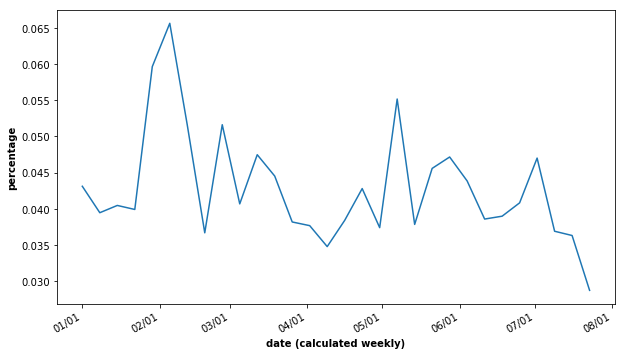

In [20]:
splitted_df = draw_graph(df, splitted=False)

/homes/jhpark/anaconda2/envs/tf/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


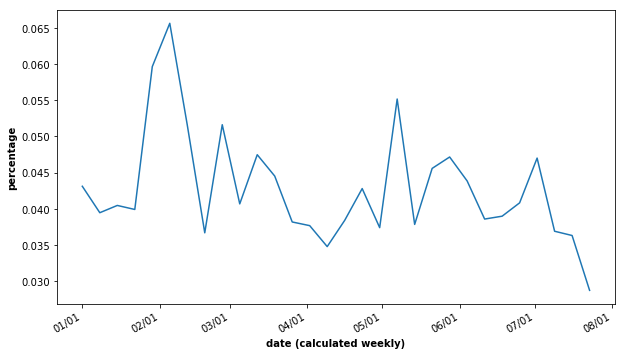

In [21]:
splitted_df = draw_graph(splitted_df, splitted=True)

In [22]:
total_count = 0
total_abusive = 0

for timeframe in splitted_df:
    total_abusive += timeframe["agree_count"]
    total_count += len(timeframe["df"])
total_abusive/total_count, total_abusive, total_count

(0.03431918478696943, 32079, 934725)

In [23]:
total_texts = []
total_gender = []
total_location = []

abusive_texts = []
abusive_gender = []
abusive_location = []

for timeframe in splitted_df:
    texts = timeframe["df"].text.tolist()
    gender = timeframe["df"].user_gender.tolist()
    location = timeframe["df"].location.tolist()
    assert len(texts) == len(gender) and len(gender) == len(location)
    assert len(timeframe["hybrid_preds"]) == len(texts)
    
    for i, pred in enumerate(timeframe["hybrid_preds"]):
        if timeframe["word_preds"][i] == pred and pred == 1:
            abusive_texts.append(texts[i])
            abusive_gender.append(gender[i])
            abusive_location.append(location[i])
            
    total_texts += texts
    total_gender += gender
    total_location +=  location

assert len(total_texts) == len(total_gender) and len(total_texts) == len(total_location)

In [24]:
random.sample(abusive_texts, 100)

['@CNN Report the rapes, assaults, killings, & Sharia enclaves in Europe. We want to prevent their mistake. #MSM liars & idiots. #Trump #MAGA',
 'Definition of #fascism more like @thedemocrats @SunsaraTaylor without nationalism than that #trump person',
 "The Trumpinator is out there, it can't be bargained with, it cant be reasoned with, it doesn't feel pity, or remorse or fear..... #Trump 🇺🇸",
 '@mahr_bill Did U miss memo? Enemy is #Trump & NOT whiny liberals, except 4 elitist #DNC #Clinton cunts',
 '@ddriskill627 @jmsexton_ @PJMedia_com @GloriaAllred should represent @MELANIATRUMP who is being held captive by an abuser named #Trump',
 '@Alifaith55 never going to happen ignorant terrorist witch @KimWeaverIA #Trump',
 'When @realDonaldTrump said that he will win so much you will grow tired of him winning. He misspoke, he meant whining. #resist #loser #trump',
 'Ewww! @CNN Freak Show #Black #Homosexual #CharlesBlow Goes Nuts After #White #Trump #Female Touches Him #CCOT #PJNet',
 '@Gran

#### total gender

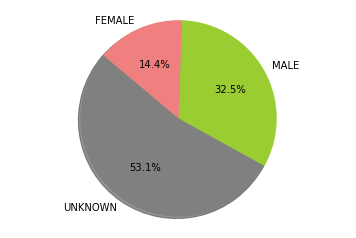

In [25]:
plt.pie([total_gender.count("UNKNOWN"), total_gender.count("MALE"), total_gender.count("FEMALE")] , 
        labels=["UNKNOWN", "MALE", "FEMALE"], colors=['grey', 'yellowgreen', 'lightcoral'],
        shadow=True, startangle=140, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

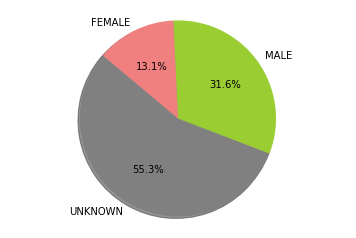

In [26]:
plt.pie([abusive_gender.count("UNKNOWN"), abusive_gender.count("MALE"), abusive_gender.count("FEMALE")] , 
        labels=["UNKNOWN", "MALE", "FEMALE"], colors=['grey', 'yellowgreen', 'lightcoral'],
        shadow=True, startangle=140, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

In [27]:
from collections import Counter
total_location_counter= Counter(total_location)
abusive_location_counter= Counter(abusive_location)


In [28]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    "Unknown": "UNKNOWN"
}

codes_key = {}
for key in us_state_abbrev:
    codes_key[us_state_abbrev[key]] = key

In [29]:
for i, (state, count) in enumerate(total_location_counter.most_common(26)):
    if state != "None":
        print("%s: %s" % (i, codes_key[state]))

1: Unknown
2: New York
3: California
4: Washington
5: Florida
6: Texas
7: Pennsylvania
8: Illinois
9: Virginia
10: Massachusetts
11: North Carolina
12: Ohio
13: Georgia
14: New Jersey
15: Michigan
16: Colorado
17: Arizona
18: Maryland
19: Oregon
20: Nevada
21: Missouri
22: Indiana
23: Tennessee
24: Connecticut
25: Minnesota


In [30]:
for i, (state, count) in enumerate(abusive_location_counter.most_common(26)):
    if state != "None":
        print("%s: %s" % (i, codes_key[state]))
    

1: Unknown
2: California
3: New York
4: Florida
5: Texas
6: Washington
7: Pennsylvania
8: Illinois
9: Georgia
10: North Carolina
11: Colorado
12: Michigan
13: Virginia
14: New Jersey
15: Massachusetts
16: Ohio
17: Arizona
18: Maryland
19: Tennessee
20: Oregon
21: Indiana
22: Nevada
23: Missouri
24: Louisiana
25: Minnesota


## co-occuring words

In [31]:
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag
import string

In [32]:
stopWords = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)
tknzr = TweetTokenizer(reduce_len=True, preserve_case=False, strip_handles=False)

In [33]:
total_words = Counter()
true_words = Counter()

In [34]:
tknzr.tokenize("#hello world")

['#hello', 'world']

In [35]:
for tokens in [tknzr.tokenize(t.translate(translator)) for t in abusive_texts]:
    words = list(filter(lambda x: x not in stopWords, tokens))
    true_words.update(words)
for tokens in [tknzr.tokenize(t.translate(translator)) for t in total_texts]:
    total_words.update(list(filter(lambda x: x not in stopWords, tokens)))

In [36]:
len(total_words), len(true_words)

(339502, 45475)

In [44]:
remove = ["MD", "DT", "RP", "IN", "RB", "VB", "CD"]
blacklist = ["dont", "u", "didnt", "im", "right", "🇺", "🇸", "‘", "youre", "hes", "…" "much", "w", "many", "got"]
_total_words = list(filter(lambda word: pos_tag([word[0]])[0][1] not in remove and word[0] not in blacklist, total_words.most_common(1000)))


In [45]:
for word, count in _total_words:
    print("%s %s" % (word, count))

trump 926420
donaldtrump 65826
maga 54980
trumps 54918
president 51706
’ 51391
us 50883
potus 45795
realdonaldtrump 42695
russia 42026
people 35247
gop 35151
obama 34028
america 27902
news 26550
cnn 26008
says 24860
donald 23947
resist 23867
time 23174
new 22327
putin 21932
think 21629
comey 21260
going 20841
media 20709
cant 18119
good 17955
said 17714
trumprussia 17593
white 17359
house 16668
day 16649
want 16100
great 16061
need 15670
doesnt 15472
administration 15162
country 14819
inauguration 14754
world 14299
russian 14290
… 13999
stop 13983
much 13958
supporters 13780
american 13604
theresistance 13532
😂 13495
usa 13282
today 13208
way 12874
election 12674
fake 12307
man 12101
thats 11699
wants 11525
press 11373
fbi 11354
real 11296
bad 11128
foxnews 11041
lies 11014
wall 10924
fakenews 10885
democrats 10667
tax 10559
americans 10554
twitter 10441
support 10433
nothing 10428
look 10195
office 10186
ban 10134
love 10128
thing 9939
job 9904
show 9881
republicans 9850
big 9750
war 

In [46]:
remove = ["MD", "DT", "RP", "IN", "RB", "VB", "CD"]
_true_words = list(filter(lambda word: pos_tag([word[0]])[0][1] not in remove and word[0] not in blacklist, true_words.most_common(1000)))


In [47]:
for word, count in _true_words:
    print("%s %s" % (word, count))

trump 30607
ass 2651
maga 2221
donaldtrump 2158
realdonaldtrump 2155
potus 1630
trumps 1581
muslim 1500
muslimban 1491
white 1459
pussy 1352
muslims 1291
bitch 1237
america 1232
us 1215
people 1194
obama 1151
president 1082
women 1041
gop 977
racist 920
😂 806
islam 794
cant 761
hate 730
man 717
fuck 711
cnn 703
ban 698
think 697
said 685
shit 680
dumb 639
resist 639
usa 611
country 609
want 595
time 571
liberals 560
need 555
dick 553
doesnt 541
house 538
supporters 533
fucking 519
ignorant 512
stop 505
real 496
going 494
grab 487
good 476
world 475
’ 472
stupid 463
thats 460
gay 459
putin 458
black 454
voted 449
american 446
americans 440
says 427
comey 417
donald 409
r 409
immigrants 409
much 401
child 400
woman 393
terrorists 390
lying 387
big 382
call 382
men 380
way 379
russia 378
great 377
support 373
terrorism 372
liberal 370
foxnews 368
bad 364
… 361
look 356
day 352
immigrant 351
new 351
face 350
needs 349
little 345
nothing 341
called 338
wants 338
bigot 337
isnt 334
️ 334
god

In [48]:
s = ""
for word, count in _total_words[:300]:
    for _ in range(int(count/100)):
        s += ("%s " % word)
s

'trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump tru

In [50]:
s = ""
for word, count in _true_words[:300]:
    for _ in range(int(count/50)):
        s += ("%s " % word)
s

'trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump trump tru

In [51]:
with open("trump_stats.txt", "w") as f:
    for timeframe in splitted_df:
        s = "%s\t%s\t%s\n" % (timeframe["date"], timeframe["agree_count"], len(timeframe["df"]))
        f.write(s)
        print(s)

2017-01-01 00:00:00	122	3711

2017-01-08 00:00:00	749	23845

2017-01-15 00:00:00	1391	43739

2017-01-22 00:00:00	1855	59080

2017-01-29 00:00:00	2968	62158

2017-02-05 00:00:00	3101	60678

2017-02-12 00:00:00	1614	40691

2017-02-19 00:00:00	1567	56914

2017-02-26 00:00:00	1348	33749

2017-03-05 00:00:00	1326	42155

2017-03-12 00:00:00	996	27152

2017-03-19 00:00:00	1066	31444

2017-03-26 00:00:00	1008	34622

2017-04-02 00:00:00	760	26356

2017-04-09 00:00:00	783	28922

2017-04-16 00:00:00	644	21741

2017-04-23 00:00:00	606	18693

2017-04-30 00:00:00	652	23049

2017-05-07 00:00:00	919	21191

2017-05-14 00:00:00	956	33159

2017-05-21 00:00:00	1280	37163

2017-05-28 00:00:00	904	24746

2017-06-04 00:00:00	1055	30946

2017-06-11 00:00:00	872	29673

2017-06-18 00:00:00	672	22369

2017-06-25 00:00:00	504	16264

2017-07-02 00:00:00	837	23613

2017-07-09 00:00:00	572	19700

2017-07-16 00:00:00	578	19909

2017-07-23 00:00:00	374	17293

